In [1]:
import numpy as np 
import pandas as pd
import scipy
import scipy.stats

C:\Users\polla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\polla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\polla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df=pd.read_csv('bicicletas-compartidas.csv')


In [5]:
df.head()

,fecha,bicis-compartidas,temp-obs,sens-temp,hum,viento,codigo-clima,festivo,findesemana,cuartil-ano
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [17]:
#frecuencias categoricas
ycat=df['cuartil-ano']
ycat=ycat.apply(lambda x:'Cat-'+ str(int(x))) #transformar valor a categorico 
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [20]:
valores,conteo_frecuencias=np.unique(ycat,return_counts=True)
valores,conteo_frecuencias
# combierte los valores a tupla como valores y las frecuencias
tabla_ferecuencias=dict(zip(valores,conteo_frecuencias)) # convierte en una array junta valores y frecuencias
tabla_ferecuencias


{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [21]:
#variable numerica
ynum=df['viento'].copy()

In [28]:
np.min(ynum),np.max(ynum)

(0.0, 56.5)

In [39]:
np.percentile(ynum,q=100)#calcular el porcentil al 100%

56.5

In [42]:
np.percentile(ynum,q=0)

(0.0, 15.0)

In [46]:
np.percentile(ynum,q=50)#media de los datos 

15.0

In [45]:
np.median(ynum)

15.0

In [49]:
#cuartiles  
valores=[0,25,75,100]
np.percentile(ynum,q=valores)

array([ 0. , 10. , 20.5, 56.5])

In [51]:
#quintiles variables de 5 grupos   
valores=[0,20,40,60,80,100]
np.percentile(ynum,q=valores)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [53]:
#Deciles variables aleatorias  
valores=list(range(0,110,10)) # va a ir de 10 en 10
np.percentile(ynum,q=valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [57]:
#valores atipicos similares alos percentiles
y=df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [60]:
#outlier
Q1=np.percentile(ynum,q=25)
Q3=np.percentile(ynum,q=75)
Rango_interquartilico=Q3-Q1
lim_inf= Q1-1.5*Rango_interquartilico
lim_sup= Q3+1.5*Rango_interquartilico

[lim_inf,lim_sup]

[-5.75, 36.25]

In [61]:
import  matplotlib.pyplot as plt

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

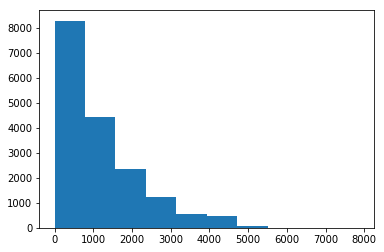

In [67]:
%matplotlib inline
plt.hist(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea94b5ab38>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea94b5af60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea942ca668>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea94b65898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea94b65be0>],
 'means': []}

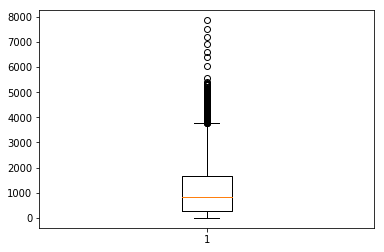

In [68]:
plt.boxplot(y)